## <center>Lab Machine Learning 7: K-Nearest Neighbor (KNN)</center>
## <center>Souaybou Bagayoko</center>
### <center> Semester 2, Nr: 303189 </center>

 

<img src="knn1.png" img>

In [158]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d
from sklearn import linear_model 
from sklearn import datasets
import seaborn as sns 

%matplotlib inline


In [121]:
#Processing the Wine dataset 
Wine_data = pd.read_csv('winequality-red.csv', sep=';') # this is a semicolumn separedt file, 
Wine_data.dropna(inplace=True)
                                                    #therefor it requires to set the delimiter = ';'
# Data describtion and info 
Wine_data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [152]:
# importing the Iris Dataset 

Iris_data = pd.read_csv('iris.data', names= ['sepal length','sepal widt','petal length','petal widt','class'])
Iris_data.head()

,sepal length,sepal widt,petal length,petal widt,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [159]:
Iris_data['class'].value_counts()

2    50
1    50
0    50
Name: class, dtype: int64

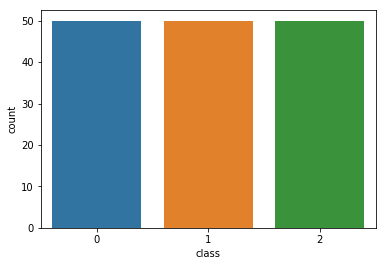

In [160]:
sns.countplot(x='class', data=Iris_data)  

In [155]:
#Hasmap encoding the Iris Class
Hasmap  =  {'Iris-versicolor':0,'Iris-setosa':1,'Iris-virginica':2}
Iris_data['class'] = Iris_data['class'].map(Hasmap)

In [156]:
Iris_data['class'].value_counts()

2    50
1    50
0    50
Name: class, dtype: int64

### Data spliting the Wine Data set 

In [161]:
def data_split(data, percentage, seed, index_reset=False):
    train = data.sample(frac=percentage/100, random_state=seed)
    tes = data.drop(train.index)
    if index_reset != False:
        train.reset_index(drop=True, inplace=True)
        tes.reset_index(drop=True,inplace=True)
    return train, tes

In [162]:
#------------Spliting-----------------------------------
Wine_train , Wine_test = data_split(Wine_data, 70, 50, True)

#---------Wine---------------------------------
X_wine = Wine_train.drop('quality',axis=1).values
Y_wine = Wine_train['quality'].values 
Y_wine = Y_wine.reshape(-1,1)

X_wine_test = Wine_test.drop('quality',axis=1).values
Y_wine_test = Wine_test['quality'].values 
Y_wine_test = Y_wine_test.reshape(-1,1)

### Data spliting the Iris Data set 

***Stratifying the Data***

***Stratifying strategie:***
    given that the data is not I will simply choose 10 % from eache class 
    Taining data = 70 %  
    Test data    = 10 % Iris-versicolor + 10 % Iris-setosa + 10 % Iris-virginica 

In [176]:
data = Iris_data

# data partitoining 
def data_split_index (data, percentage, seed):
    tes = data.sample(frac=percentage/100, random_state=seed) # taking the percentage of t
                                                                #the shuffle  data 
    train = data.drop(tes.index)                                # puttint the rest inton the 
                                                                #test data  
    return train, tes

groupe = 'class'
Classe  = data.groupby(groupe)
count  = data[groupe].value_counts()
min_   = min(count.values)
a = 0
for g, _ in Classe:
    if count[g] > min_:
        g = data[data[groupe]==g].sample(frac=1)[:min_] # I select the number fix number of stradum 
    else: 
        g = data[data[groupe]==g]

    if a == 0:  
        train, tes = data_split_index(g,20,50)         # here We choose 70% tranini and 30% test 
    else :
        train_new, tes_new = data_split_index(g,20,50)
        train = pd.concat([train, train_new], axis=0)
        tes   = pd.concat([tes, tes_new], axis=0)
    a +=1
# # I put the rest of the data into the tes data 
# rest = data.drop(train.index)
# rest.drop(tes.index, inplace=True)
# tes   = pd.concat([tes, rest], axis=0)

In [327]:
Iris_train  = train.drop('class', axis=1).values
Iris_train_label  = train['class'].values
Iris_test   = tes.drop('class', axis=1).values
Iris_test_label   = tes['class'].values

### defining the model 

In [406]:
# defining the distance measurment 
################################################################
def dist_eu(q,x):
    "return the euclidien norm"
    return np.linalg.norm(x-q)

***Implementing a fucntion that return the top K Neares***

In [408]:

def get_neighbors(q, x , y, k):
    # defining the distance between the query and the all the elment in the dataset
    distances = [(key,dist_eu(q,val), y[key]) for key, val in enumerate(x) ]
    #sorting the K_nearest neighbor
    distances.sort(key=lambda x: x[1])               # soting by the shortest distance 
    return distances[:k] 


***Prediction for a given query***

For Regression:

In [438]:
from functools import reduce
from collections import Counter, defaultdict


 
def predict_knn_reg(x_q,y_q, x,y, k, plot=False, verbose=True,score=True, slices=None):

    history = defaultdict(dict)
    acuracy = defaultdict(dict)
    if slices==None:   # if not given a specifige chunk, get the the whole test set 
        slices = len(y_q)
        
    for k_i in k:
        tmp  = []
        tmp1  = []
        for i in range(slices):
            total_distance = 0
            neighbors = get_neighbors(x_q[i],x,y,k_i)
            for neight in neighbors:
                total_distance +=  neight[2][0] # adding all the target value from selected neighbor 
            pred = total_distance/len(neighbors)
            tmp.append(pred)
            tmp1.append(np.sqrt(abs(pred - y_q[i])))
        history[k_i] = tmp
        acuracy[k_i] = tmp1
        if verbose:
            print(f" K={k_i} : predicted {pred} target {y_q[k_i]}")
         #----------ploting---------------

    if plot:
        x_ = list(range(slices))
    
        for num, k_i in enumerate(k): 
            fig, ax = plt.subplots(figsize=(10, 5))
            y_ = history[k_i] 
            x_ = list(range(slices))
           
            ax.plot(x_, y_ , label=f"for K={k_i}")
            ax.plot(x_, y_q.flatten()[:slices] , label='y')
            ax.legend(loc='best')
        if score:
            x_1 = list(range(slices))
            plt.figure(figsize = (12,8))
            for num, k_i in enumerate(k):           
                y_1 = acuracy[k_i] 
                        
                plt.plot(x_1, y_1, label=f"for K={k_i}")
                plt.xlabel('Number of query')
                plt.ylabel('the difference')
                plt.title('Predicted - Target')
                plt.legend()
                


For Classification 

In [439]:
# KNN for Classification using the most commmon as class selection criteria 
def vote(neighbors):
    class_counter = Counter()
    for neighbor in neighbors:
        
        class_counter[neighbor[2]] += 1/len(neighbors)   # assigning a probabily weight to the predicted class
    return class_counter.most_common(1)[0][0]            #return the 

################################################    
def predict_knn_class(x_q,y_q,  x,y, k, plot=False, verbose=True):

    history = defaultdict(int)
    for k_i in k:
        for i in range(len(y_q)):
            neighbors  = get_neighbors(x_q[i],x,y,k_i)
            winner = vote(neighbors)
            if  winner == y_q[i]:
                history[k_i] += 1
        if verbose:
            print(f" K={k_i} : correctly predicted {history[k_i]} out of {len(y_q)}")
    #----------ploting---------------

    if plot:

        fig, ax = plt.subplots(nrows=1,ncols=1 ,figsize=(15, 7))
        x, y = zip(*history.items()) 
        ax.plot(x, y , label=x)
        ax.legend(loc='best')
        ax.title.set_text("")
        
    return winner


***To measure the quality of the prediction, I will mesure the prdicted valut againt the target***
To do, I will take here the absolut value of their difference. Note thar we can also use RMSE to see how close they are 

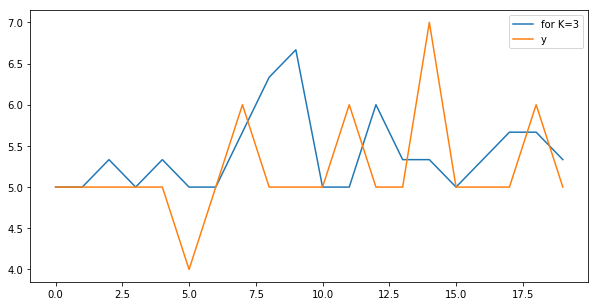

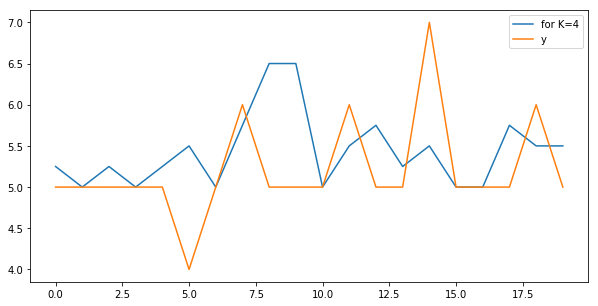

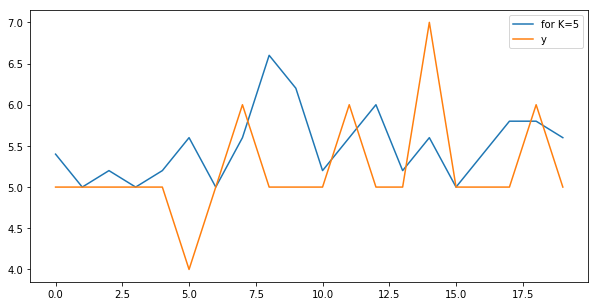

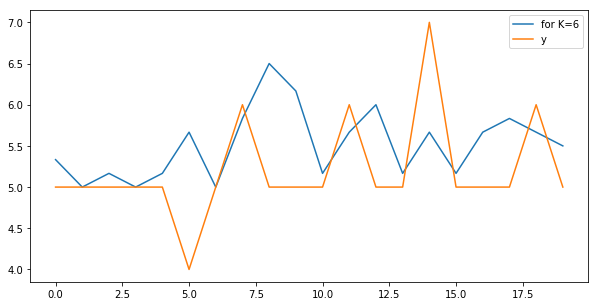

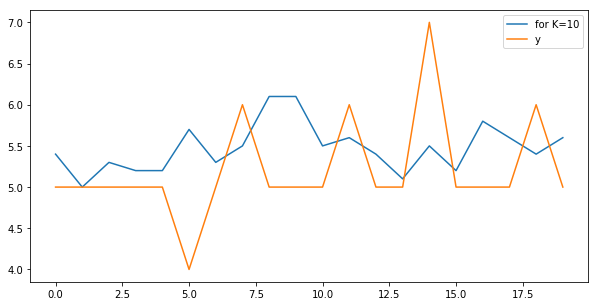

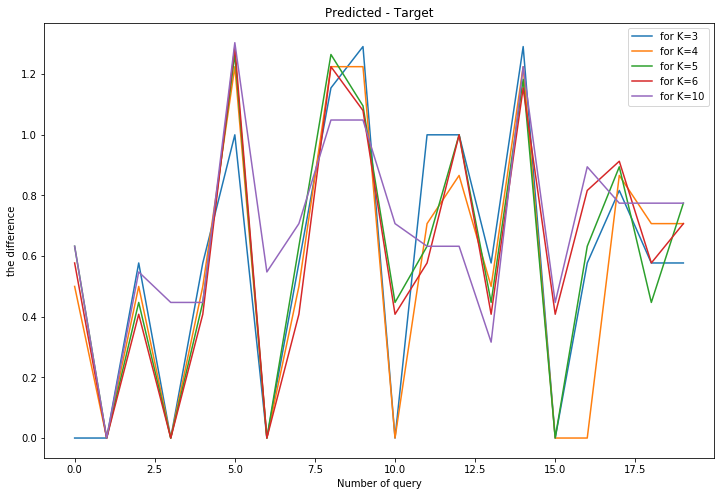

In [441]:
K = [3,4,5,6,10]
predict_knn_reg(X_wine_test,Y_wine_test,X_wine,Y_wine, K, plot=True, verbose=False,slices=20)

To measure the Accuracy, I simply take differnce between the predicted and the Target(i.e , first query K = 3 outperfrom better than all other. 
A useful accuracy can be infer by also mesuring the RMSE.  

***CLassifocation***

In [486]:
K = [1,2,3,4,10]
predict_knn_class(Iris_test,Iris_test_label, Iris_train,Iris_train_label, K, plot=False, verbose=True)

 K=1 : correctly predicted 30 out of 30
 K=2 : correctly predicted 30 out of 30
 K=3 : correctly predicted 30 out of 30
 K=4 : correctly predicted 30 out of 30
 K=10 : correctly predicted 30 out of 30


2

***Let's visualise the data to understant the uunderlying difference between these clases***
'Iris-versicolor':0,'Iris-setosa':1,'Iris-virginica':

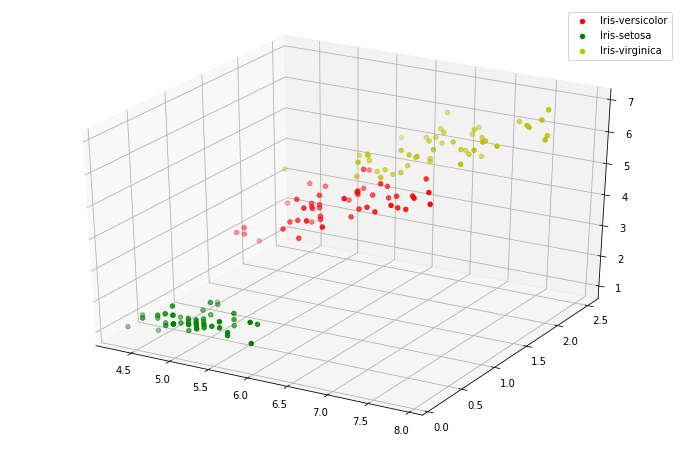

In [490]:
colum = ['Iris-versicolor','Iris-setosa','Iris-virginica']
colours = ("r", "g", "y")
fig = plt.figure(figsize = (12,8))
ax = fig.add_subplot(111, projection='3d')
for iclass in range(3):
    x_c = Iris_data['sepal length'][Iris_data['class']==iclass].values
    y_c = Iris_data['petal widt'][Iris_data['class']==iclass].values
    z_c = Iris_data['petal length'][Iris_data['class']==iclass].values
    ax.scatter(x_c,y_c,z_c,c=colours[iclass], label=colum[iclass])
    ax.legend(loc='best')


We can notice these clases are neatly separated, Therefore, the accuracy of the model is quiet High 


<img src="knn2.png" img>